# (a) - Evaluating the best times and days of the week to minimise flight delays

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

                          

In [2]:
selected_columns = ['Year','Month','DayofMonth','DayOfWeek','CRSDepTime','ArrDelay','DepDelay']
df1 = pd.read_csv(r'/Users/Pavan/Documents/3rd year SGs and material/Programming for data science/Coursework Datasets/2006.csv',usecols =selected_columns)
df2 = pd.read_csv(r'/Users/Pavan/Documents/3rd year SGs and material/Programming for data science/Coursework Datasets/2007.csv',usecols =selected_columns)
main_dataset = pd.concat([df1,df2])
del df1, df2

In [3]:
main_dataset.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrDelay,DepDelay
0,2006,1,11,3,745,6.0,-2.0
1,2006,1,11,3,1053,-5.0,0.0
2,2006,1,11,3,1915,-23.0,0.0
3,2006,1,11,3,1755,-8.0,-2.0
4,2006,1,11,3,832,0.0,-8.0


In [4]:
pd.isnull(main_dataset).sum(axis = 0)

Year               0
Month              0
DayofMonth         0
DayOfWeek          0
CRSDepTime         0
ArrDelay      316047
DepDelay      282682
dtype: int64

In [5]:
correlation = main_dataset['ArrDelay'].corr(main_dataset['DepDelay'])
correlation

0.9258279051569631

We observe a large correlation between ArrDelay and DepDelay, which intuitively makes sense as well since if a flight is delayed at departure, it is likely to also be delayed in its arrival. Hence, we will consider Arrival Delay only for analysis in python, and Departure delay for analysis in R.


In [6]:
main_dataset = main_dataset.drop(columns=['DepDelay'])

In [7]:
#Removing null values in DepDelay
main_dataset = main_dataset.dropna(subset = ['ArrDelay'])
pd.isnull(main_dataset).sum(axis = 0)

Year          0
Month         0
DayofMonth    0
DayOfWeek     0
CRSDepTime    0
ArrDelay      0
dtype: int64

In [8]:
#changing values of time for greater readability and in preparation to extract hour values
Minutes1 = main_dataset.CRSDepTime.astype(str).str[-2:]
Minutes1

0          45
1          53
2          15
3          55
4          32
           ..
7453210    05
7453211    51
7453212    25
7453213    15
7453214    00
Name: CRSDepTime, Length: 14279090, dtype: object

In [9]:
Hours1 = main_dataset.CRSDepTime.astype(str).str[:-2]
#We use str[:-2] since for hours, we want the values before the last two characters of each time string
Hours1

0           7
1          10
2          19
3          17
4           8
           ..
7453210    16
7453211    18
7453212    10
7453213    13
7453214    18
Name: CRSDepTime, Length: 14279090, dtype: object

In [10]:
#There may be values in hours that are empty, which would represent 12am or 00. Hence we will replace these empty values with 0
Hours1[Hours1 == ""] = "0"

In [11]:
main_dataset['CRSDepTime'] = pd.to_datetime(Hours1 + ":" + Minutes1, format='%H:%M').dt.time
main_dataset.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrDelay
0,2006,1,11,3,07:45:00,6.0
1,2006,1,11,3,10:53:00,-5.0
2,2006,1,11,3,19:15:00,-23.0
3,2006,1,11,3,17:55:00,-8.0
4,2006,1,11,3,08:32:00,0.0


In [12]:
#Turning negative values to 0, since they represent no delays
main_dataset['ArrDelay'] = main_dataset['ArrDelay'].clip(lower=0)

In [13]:
#Creating an hour column
main_dataset['Hour'] = main_dataset['CRSDepTime'].apply(lambda x: x.hour)

In [14]:
MeanDelay_by_hour = main_dataset.groupby('Hour')['ArrDelay'].mean()

In [15]:
MeanDelay_by_day = main_dataset.groupby('DayOfWeek')['ArrDelay'].mean()

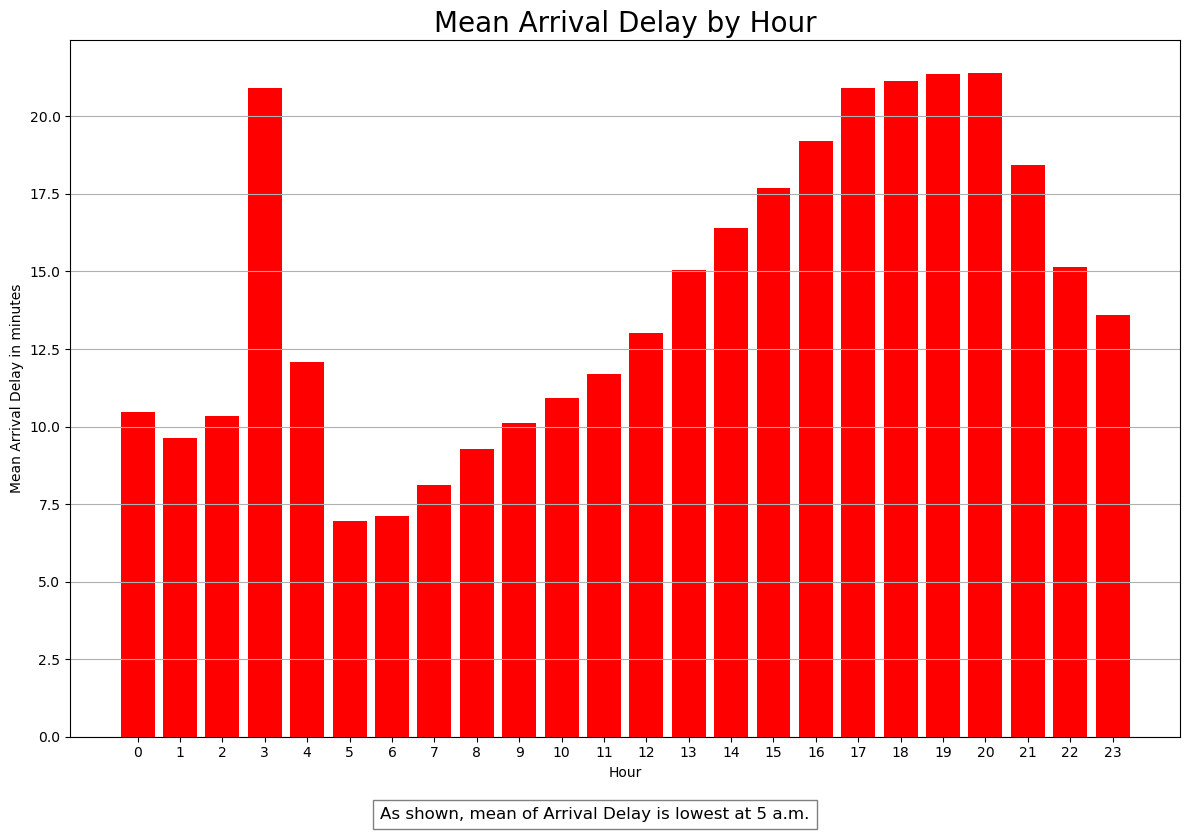

In [16]:
#Plotting graph to observe different mean delay values by hour of both years combined
mean_hours = MeanDelay_by_hour.index
mean_delays_hours = MeanDelay_by_hour.values

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.bar(mean_hours, mean_delays_hours, color='red')
plt.xlabel('Hour')
plt.ylabel('Mean Arrival Delay in minutes')
plt.title('Mean Arrival Delay by Hour', fontsize=20)
plt.figtext(0.5, -0.03, "As shown, mean of Arrival Delay is lowest at 5 a.m.", ha="center", fontsize=12, bbox={"facecolor":"none", "alpha":0.5, "pad":5})
plt.xticks(mean_hours)  # Set x-axis ticks to be the hours
plt.grid(axis='y')  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

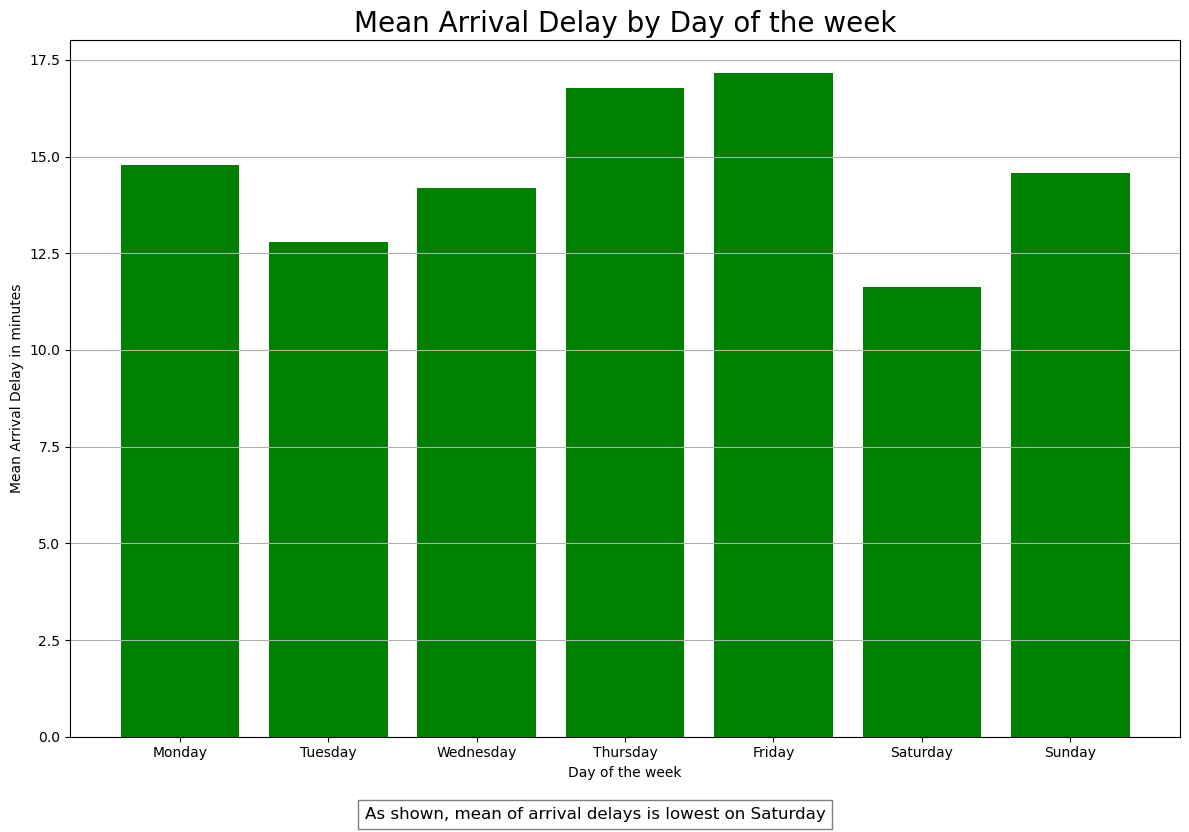

In [17]:
#Plotting graph to observe different mean delay values by day of the week of both years combined
mean_DayOfWeek = MeanDelay_by_day.index
mean_delays_DayOfWeek = MeanDelay_by_day.values
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 8)) 
plt.bar(mean_DayOfWeek, mean_delays_DayOfWeek, color='green')
plt.xlabel('Day of the week')
plt.ylabel('Mean Arrival Delay in minutes')
plt.title('Mean Arrival Delay by Day of the week', fontsize=20)
plt.figtext(0.5, -0.03, "As shown, mean of arrival delays is lowest on Saturday", ha="center", fontsize=12, bbox={"facecolor":"none", "alpha":0.5, "pad":5})
plt.xticks(range(1, 8), day_labels)  
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<Figure size 1200x800 with 0 Axes>

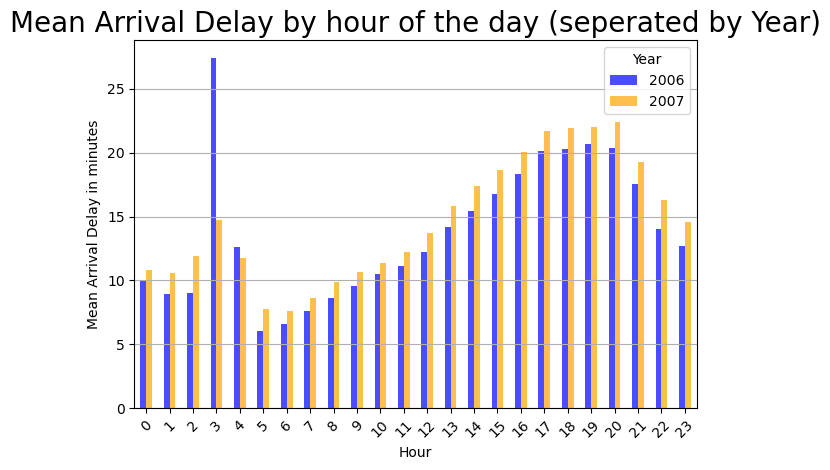

In [18]:
#Plotting graph to show mean delay by hour for each year
pivot_table_hour = main_dataset.pivot_table(index='Hour', columns='Year', values='ArrDelay', aggfunc='mean')

# Plotting the pivot table
plt.figure(figsize=(12, 8))
pivot_table_hour.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.xlabel('Hour')
plt.ylabel('Mean Arrival Delay in minutes')
plt.title('Mean Arrival Delay by hour of the day (seperated by Year)', fontsize=20)
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

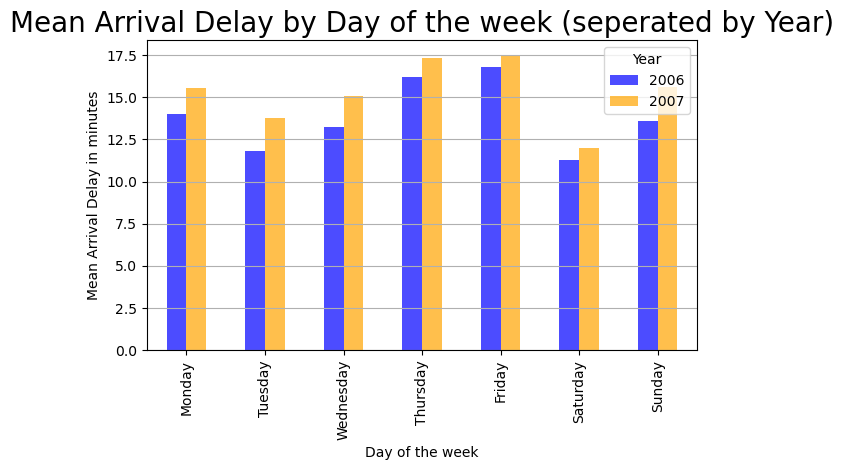

In [19]:
#Plotting graph to show mean delay by day of week for each year
pivot_table_day = main_dataset.pivot_table(index='DayOfWeek', columns='Year', values='ArrDelay', aggfunc='mean')

# Plotting the pivot table
plt.figure(figsize=(12, 8))
pivot_table_day.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.xlabel('Day of the week')
plt.ylabel('Mean Arrival Delay in minutes')
plt.title('Mean Arrival Delay by Day of the week (seperated by Year)', fontsize=20)
plt.xticks(range(0, 7), day_labels)
plt.legend(title='Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()